In [1]:
import os
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from tb_convert import parse_tensorboard
from IPython.display import display

2023-01-16 14:05:52.943295: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [2]:
%pwd
%cd ../../ml/Tensorboard/

folder = r'MLP/hparam_test_4'
# folder = r'MLP_WIN/hparam_test'

/home/tomje/ml/Tensorboard


In [3]:
path = os.path.join(folder, r'Results/hparams_table.csv')
results = pd.read_csv(path)
# results.sort_values(by=['epochs','no_nodes']).reset_index(drop=True)

In [4]:
metrics = ['CV MAE (µm)',
         'CV MSE (µm²)',
         'CV R²',
         'CV Std MAE (± µm)',
         'CV Std MSE (± µm²)',
         'CV Std R² (±)',
         'Val MAE (µm)',
         'Val MSE (µm²)',
         'Val R²']

hparams = [hp for hp in results.keys() if hp not in metrics and results[hp].nunique() != 1]
hparams

['no_layers', 'init_mode']

Attempt to load in scalar data to pandas

In [5]:
scalars = ['cv_iter/mse', 'cv_iter/mae', 'cv_iter/r2']

dirs = os.listdir(folder)
a = ['MLP_Win-', 'MLP-', 'LSTM-']
dirs = [x for x in dirs if any(a in x for a in a)]
dirs.sort()

In [6]:
df = {x: parse_tensorboard(os.path.join(folder, x), scalars)
                        for x in dirs}
df = pd.concat(df.values(), keys=df.keys())

results['trial_id'] = df.index.levels[0]
for col in df.columns.values:
    if 'mse' in col:
        scale = 1e6
    elif 'mae' in col:
        scale = 1e3
    else:
        scale = 1
            
    data = [df.loc[trial_id][col].values * scale for trial_id in df.index.levels[0]]
    results[col] = data
results

,no_layers,epochs,init_mode,batch_size,loss,no_nodes,dropout,CV MAE (µm),CV MSE (µm²),CV R²,CV Std MAE (± µm),CV Std MSE (± µm²),CV Std R² (±),Val MAE (µm),Val MSE (µm²),Val R²,trial_id,cv_iter/mse,cv_iter/mae,cv_iter/r2
0,4.0,2000.0,glorot_normal,15.0,mse,128.0,0.01,1.058779,8.285865,0.931111,0.462282,10.301003,0.084541,0.907020,6.090847,0.948716,MLP-E-2000-B-15-L[128 128 128 128]-D-0.01-2023...,"[15.609228, 0.51501465, 10.68747, 27.249973, 0...","[1.2333013, 0.57397866, 1.6083899, 1.500257, 0...","[0.90148556, 0.9959659, 0.90087366, 0.74181885..."
1,4.0,2000.0,glorot_uniform,15.0,mse,128.0,0.01,0.979775,7.447396,0.941817,0.394478,11.276627,0.070793,1.504989,17.939375,0.875031,MLP-E-2000-B-15-L[128 128 128 128]-D-0.01-2023...,"[1.404741, 6.493885, 3.8369758, 9.358403, 2.03...","[0.8552564, 0.7668121, 0.6247915, 0.9089965, 0...","[0.9895765, 0.92497367, 0.97437525, 0.9200104,..."
2,4.0,2000.0,he_normal,15.0,mse,128.0,0.01,1.048582,9.490479,0.925970,0.458185,12.606728,0.090748,1.065266,4.593862,0.960557,MLP-E-2000-B-15-L[128 128 128 128]-D-0.01-2023...,"[4.513702, 65.00474, 3.1636887, 1.0827538, 1.6...","[0.80903006, 3.3017297, 0.8372014, 0.82028824,...","[0.94812477, 0.6112991, 0.974285, 0.9908511, 0..."
3,4.0,2000.0,he_uniform,15.0,mse,128.0,0.01,1.039709,9.881169,0.923077,0.410533,11.601471,0.081714,1.287426,25.284336,0.784642,MLP-E-2000-B-15-L[128 128 128 128]-D-0.01-2023...,"[16.712326, 0.4000154, 2.5654602, 9.122331, 0....","[1.1211041, 0.47545385, 0.79046154, 0.96107286...","[0.86753935, 0.99556243, 0.97818315, 0.9330746..."
4,4.0,2000.0,random_normal,15.0,mse,128.0,0.01,1.201039,11.485087,0.904750,0.672371,14.058834,0.110895,0.813688,4.580745,0.966290,MLP-E-2000-B-15-L[128 128 128 128]-D-0.01-2023...,"[37.469456, 20.079218, 5.069238, 3.9026713, 8....","[2.1328037, 1.2446407, 1.233731, 0.7892222, 1....","[0.6973111, 0.80380887, 0.9679816, 0.96639544,..."
5,3.0,2000.0,glorot_normal,15.0,mse,128.0,0.01,1.225487,12.738726,0.885214,0.496496,14.348410,0.124543,1.131301,8.183701,0.950608,MLP-E-2000-B-15-L[128 128 128]-D-0.01-20230112...,"[0.68849796, 3.4920132, 23.425352, 15.025276, ...","[0.54301745, 1.0908768, 1.3407047, 2.4910967, ...","[0.98811346, 0.9611745, 0.7718777, 0.8679754, ..."
6,3.0,2000.0,glorot_uniform,15.0,mse,128.0,0.01,1.081987,8.937315,0.922096,0.444554,10.461933,0.086185,1.117454,8.341574,0.948035,MLP-E-2000-B-15-L[128 128 128]-D-0.01-20230112...,"[14.792956, 24.610416, 11.12714, 0.60311824, 3...","[1.1108159, 1.9251194, 1.5174669, 0.60087186, ...","[0.79867697, 0.788195, 0.91963196, 0.99314344,..."
7,3.0,2000.0,he_normal,15.0,mse,128.0,0.01,1.175348,9.857289,0.925299,0.427780,11.638212,0.081336,1.116204,7.934240,0.925269,MLP-E-2000-B-15-L[128 128 128]-D-0.01-20230112...,"[19.215332, 1.1186944, 2.954917, 1.247361, 15....","[1.168573, 0.8219638, 0.8787173, 0.79604125, 1...","[0.8775787, 0.9902631, 0.97509426, 0.98869056,..."
8,3.0,2000.0,he_uniform,15.0,mse,128.0,0.01,1.139046,9.415482,0.927038,0.437920,10.080410,0.076536,1.045888,5.788049,0.950879,MLP-E-2000-B-15-L[128 128 128]-D-0.01-20230112...,"[2.623423, 16.47714, 2.7766917, 11.12558, 1.71...","[0.92961085, 1.4761177, 0.8626701, 1.2574607, ...","[0.9727766, 0.85350966, 0.9825263, 0.9288572, ..."
9,3.0,2000.0,random_normal,15.0,mse,128.0,0.01,1.306572,9.957751,0.919739,0.455035,10.936232,0.072225,1.188386,7.845821,0.945323,MLP-E-2000-B-15-L[128 128 128]-D-0.01-20230112...,"[15.979786, 6.398185, 11.156912, 6.4696574, 2....","[1.9514058, 1.2750406, 1.1100225, 1.375738, 0....","[0.85449517, 0.9460625, 0.9057598, 0.95132565,..."


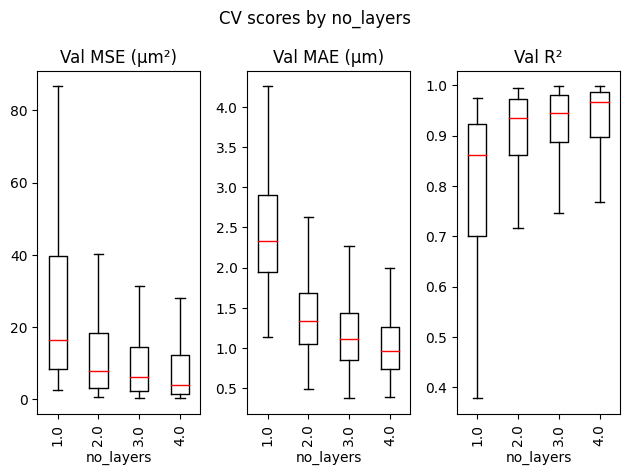

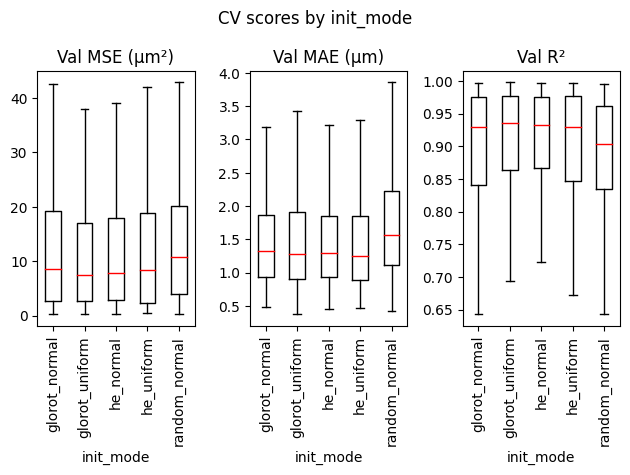

In [7]:
def cv_iter_boxplot(results, hparam, scalars):
    test = [results.groupby(hparam)[scalar].apply(np.hstack) for scalar in scalars]    
    test = pd.concat(test, axis=1)
    fig, axes = plt.subplots(1, 3)
    for i, ax in enumerate(axes):
        ax.boxplot(x=test.iloc[:,i], labels=test.index.values, showfliers=False, medianprops={'color': 'r'})
        ax.set_xlabel(hparam)
        # ax.set_ylabel(test.columns.values[i])
        ax.tick_params('x', labelrotation=90)
    
    fig.suptitle(f'CV scores by {hparam}')
    axes[0].set_title('Val MSE (µm²)')
    axes[1].set_title('Val MAE (µm)')
    axes[2].set_title('Val R²')
    plt.tight_layout()

for hparam in hparams:
    cv_iter_boxplot(results, hparam, scalars)


    

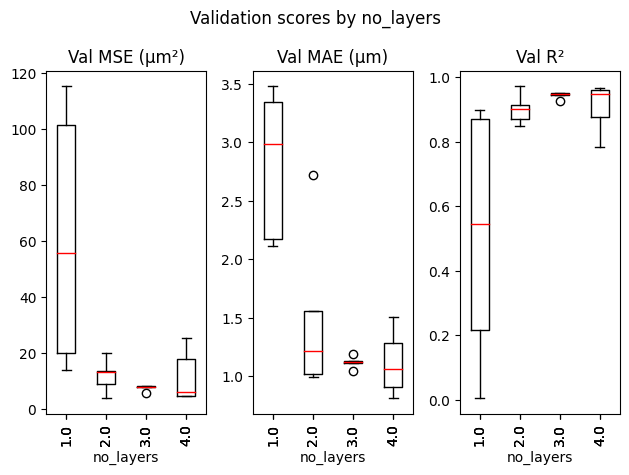

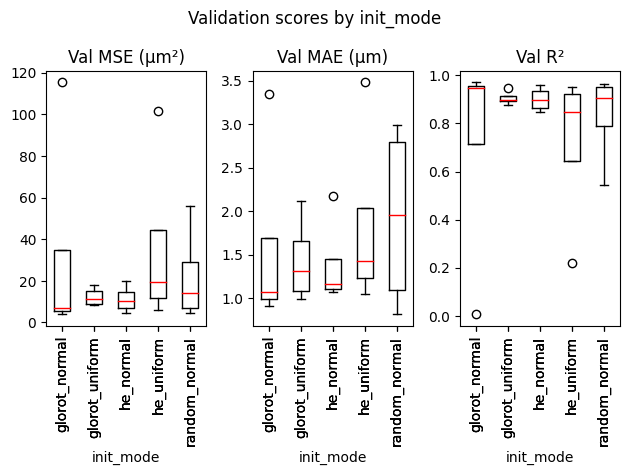

In [10]:
def plt_boxplot(result_df, hparam):
    plt.rc('font', weight='normal')
    axes = result_df.boxplot(column=['Val MSE (µm²)', 'Val MAE (µm)', 'Val R²'],
                      by=hparam,
                      layout=(1,3),
                      rot=90,
                      sharey=False,
                      showfliers=True,
                      grid=False,
                      color=dict(boxes='k', whiskers='k', medians='r', caps='k'),
                     )
    plt.suptitle(f'Validation scores by {hparam}')
    plt.tight_layout()

for hparam in hparams:
    plt_boxplot(results, hparam)

In [9]:
def mean_hparam(result_df, hparam):
    other_hp = [hp for hp in hparams if hp is not hparam]
    result_df = result_df.groupby([hparam]).mean(numeric_only=True).drop(columns=other_hp, errors='ignore')
    display(result_df.loc[:,result_df.nunique()!=1])
    
for hparam in hparams:
    mean_hparam(results, hparam)

,CV MAE (µm),CV MSE (µm²),CV R²,CV Std MAE (± µm),CV Std MSE (± µm²),CV Std R² (±),Val MAE (µm),Val MSE (µm²),Val R²
no_layers,,,,,,,,,
1.0,2.534464,48.631589,0.591027,0.844275,124.494906,1.004168,2.821488,61.331713,0.507091
2.0,1.416346,12.853094,0.897641,0.468723,14.370201,0.105412,1.500441,11.918626,0.900758
3.0,1.185688,10.181313,0.915877,0.452357,11.493039,0.088165,1.119847,7.618677,0.944023
4.0,1.065577,9.317999,0.925345,0.479570,11.968933,0.087738,1.115678,11.697833,0.907047


,CV MAE (µm),CV MSE (µm²),CV R²,CV Std MAE (± µm),CV Std MSE (± µm²),CV Std R² (±),Val MAE (µm),Val MSE (µm²),Val R²
init_mode,,,,,,,,,
glorot_normal,1.489639,17.380704,0.854044,0.546015,26.711402,0.211383,1.600879,33.399183,0.719219
glorot_uniform,1.491438,15.472580,0.872501,0.478012,18.931427,0.147238,1.433420,12.299068,0.905322
he_normal,1.523253,21.866259,0.817786,0.545703,35.800271,0.298375,1.392650,11.423762,0.900973
he_uniform,1.505590,29.329075,0.759820,0.627566,100.500890,0.784374,1.842322,36.493045,0.717006
random_normal,1.742673,17.181375,0.858211,0.608859,20.964859,0.165484,1.927547,22.093503,0.831129
